In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [16]:
data = pd.read_csv("anes2020_issues_correlations.csv")
data

,Issue,ANES_Variable,Cor_to_Party_ID,Normalized_Variance,Point_Scale,Type,Source,URL
0,urban_unrest,v201429,0.641563,0.150437,7,Security,paper,https://raw.githubusercontent.com/Watts-Lab/de...
1,gov_assistance_blacks,v201258,0.567702,0.116457,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
2,blks_get_less_than_deserve,v202302,0.565174,0.122538,5,Civil Rights,paper,https://raw.githubusercontent.com/Watts-Lab/de...
3,protesters_actions,v201432x,0.558979,0.141078,5,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...
4,gov_guarantees_job,v201255,0.554518,0.108085,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
5,climate_chng_severe,v202332,0.551410,0.114623,5,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...
6,gov_services,v201246,0.549632,0.091725,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
7,climate_chng_importance,v202333,0.542188,0.114671,5,Moral,new,https://raw.githubusercontent.com/Watts-Lab/de...
8,fs_border_security,v201308x,0.535563,0.113395,5,Economic,new,https://raw.githubusercontent.com/Watts-Lab/de...
9,immigration_crime,v202239x,0.532702,0.044546,7,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...


In [23]:
data["Normalized_Variance"].quantile(q=.5)

0.09421837576204525

(0.03785497973051882, 0.18505135620326169)

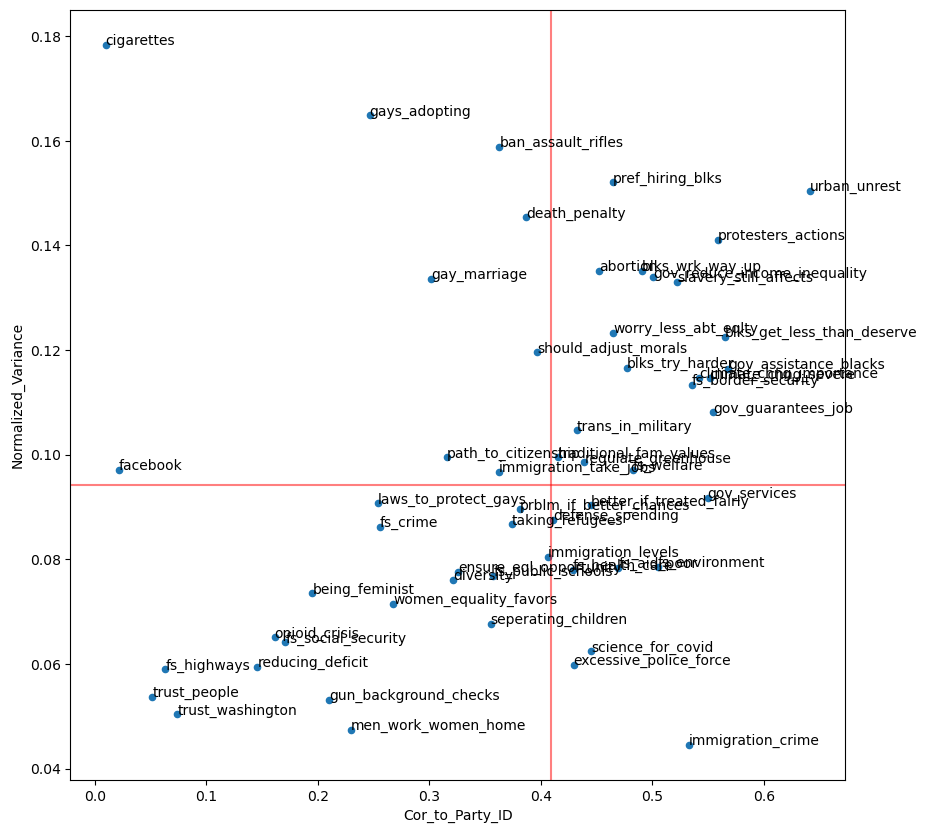

In [31]:
ax = data[['Cor_to_Party_ID', 'Normalized_Variance']].plot(x="Cor_to_Party_ID", y="Normalized_Variance",kind="scatter", figsize=(10,10))
data[['Cor_to_Party_ID', 'Normalized_Variance','Issue']].apply(lambda row: ax.text(*row),axis=1);
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.hlines(data["Normalized_Variance"].quantile(q=.5), *xlim, color="r", alpha=.5)
plt.vlines(data["Cor_to_Party_ID"].quantile(q=.5), *ylim, color="r", alpha=.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)



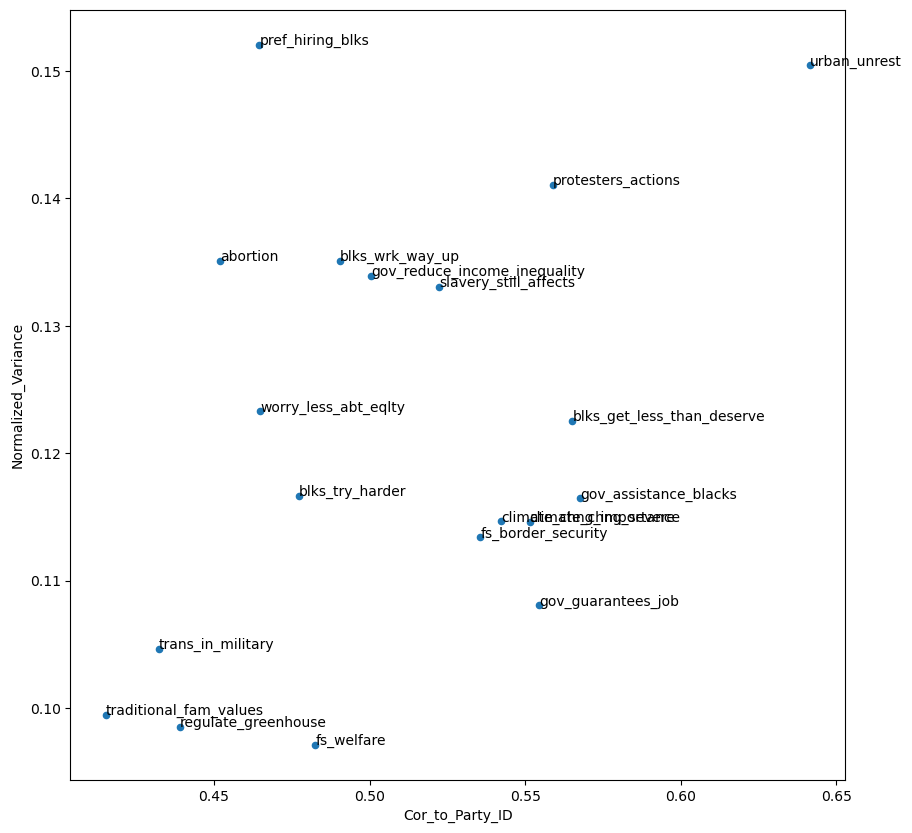

In [42]:
quadrant = data[(data['Cor_to_Party_ID'] > data["Cor_to_Party_ID"].quantile(q=.5)) & (data['Normalized_Variance'] > data["Normalized_Variance"].quantile(q=.5))]
# quadrant
ax = quadrant[['Cor_to_Party_ID', 'Normalized_Variance']].plot(x="Cor_to_Party_ID", y="Normalized_Variance", kind="scatter", figsize=(10,10))
quadrant[['Cor_to_Party_ID', 'Normalized_Variance','Issue']].apply(lambda row: ax.text(*row),axis=1);


In [39]:
quadrant

,Issue,ANES_Variable,Cor_to_Party_ID,Normalized_Variance,Point_Scale,Type,Source,URL
0,urban_unrest,v201429,0.641563,0.150437,7,Security,paper,https://raw.githubusercontent.com/Watts-Lab/de...
1,gov_assistance_blacks,v201258,0.567702,0.116457,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
2,blks_get_less_than_deserve,v202302,0.565174,0.122538,5,Civil Rights,paper,https://raw.githubusercontent.com/Watts-Lab/de...
3,protesters_actions,v201432x,0.558979,0.141078,5,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...
4,gov_guarantees_job,v201255,0.554518,0.108085,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
5,climate_chng_severe,v202332,0.551410,0.114623,5,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...
7,climate_chng_importance,v202333,0.542188,0.114671,5,Moral,new,https://raw.githubusercontent.com/Watts-Lab/de...
8,fs_border_security,v201308x,0.535563,0.113395,5,Economic,new,https://raw.githubusercontent.com/Watts-Lab/de...
10,slavery_still_affects,v202301,0.522250,0.133069,5,Civil Rights,paper,https://raw.githubusercontent.com/Watts-Lab/de...
12,gov_reduce_income_inequality,v202259x,0.500407,0.133933,7,Economic,new,https://raw.githubusercontent.com/Watts-Lab/de...


In [43]:
quadrant[(quadrant['Cor_to_Party_ID'] > .53) & (quadrant['Normalized_Variance'] < .12) ]
                                                                                      

,Issue,ANES_Variable,Cor_to_Party_ID,Normalized_Variance,Point_Scale,Type,Source,URL
1,gov_assistance_blacks,v201258,0.567702,0.116457,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
4,gov_guarantees_job,v201255,0.554518,0.108085,7,Economic,paper,https://raw.githubusercontent.com/Watts-Lab/de...
5,climate_chng_severe,v202332,0.551410,0.114623,5,Security,new,https://raw.githubusercontent.com/Watts-Lab/de...
7,climate_chng_importance,v202333,0.542188,0.114671,5,Moral,new,https://raw.githubusercontent.com/Watts-Lab/de...
8,fs_border_security,v201308x,0.535563,0.113395,5,Economic,new,https://raw.githubusercontent.com/Watts-Lab/de...
